In [17]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [23]:
def load_and_preprocess_data(flatten=False):
    # We'll be using the MNIST dataset
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    # Normalize the data to be between 0 and 1
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0

    if flatten:
        # Flatten the images for MLP
        x_train = x_train.reshape(-1, 28 * 28)
        x_test = x_test.reshape(-1, 28 * 28)
    else:
        # Reshape data to include the channel dimension
        x_train = np.expand_dims(x_train, -1)
        x_test = np.expand_dims(x_test, -1)

    # One-hot encode the labels
    y_train = to_categorical(y_train, 10)
    y_test = to_categorical(y_test, 10)

    return (x_train, y_train), (x_test, y_test)

In [4]:
def cnn():
    model = models.Sequential()

    # Convolutional Layer 1
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional Layer 2
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional Layer 3
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # Flatten the output from convolutional layers
    model.add(layers.Flatten())

    # Fully Connected Layer 1
    model.add(layers.Dense(64, activation='relu'))

    # Output Layer
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [19]:
def mlp():
    model = models.Sequential()

    # Input layer
    model.add(layers.InputLayer(input_shape=(28 * 28,)))

    # Fully Connected Layer 1
    model.add(layers.Dense(128, activation='relu'))

    # Fully Connected Layer 2
    model.add(layers.Dense(64, activation='relu'))

    # Output Layer
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [11]:
def train_model(model, x_train, y_train, x_test, y_test, epochs=5, batch_size=64):
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(x_test, y_test))
    return model, history

In [7]:
def evaluate_model(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    print("Test accuracy:", test_acc)

In [21]:
def plot_training_history(history, title):
    # Plot training & validation loss values
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{title} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Training Loss', 'Validation Loss'])

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{title} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Training Accuracy', 'Validation Accuracy'])

    plt.tight_layout()
    plt.show()

In [15]:
def plot_filters(model):
    # Extract the weights of the first convolutional layer
    filters, biases = model.layers[0].get_weights()

    # Normalize filter values to [0, 1] for visualization
    filters = (filters - filters.min()) / (filters.max() - filters.min())

    # Plot the filters
    num_filters = filters.shape[3]
    plt.figure(figsize=(10, 10))
    for i in range(num_filters):
        plt.subplot(8, 8, i+1)
        plt.imshow(filters[:, :, 0, i], cmap='gray')
        plt.axis('off')
    plt.show()

Epoch 1/5
938/938 [==============================] - 55s 57ms/step - loss: 0.1955 - accuracy: 0.9419 - val_loss: 0.0659 - val_accuracy: 0.9790
Epoch 2/5
938/938 [==============================] - 50s 54ms/step - loss: 0.0522 - accuracy: 0.9842 - val_loss: 0.0385 - val_accuracy: 0.9859
Epoch 3/5
938/938 [==============================] - 52s 55ms/step - loss: 0.0377 - accuracy: 0.9884 - val_loss: 0.0308 - val_accuracy: 0.9894
Epoch 4/5
938/938 [==============================] - 52s 56ms/step - loss: 0.0283 - accuracy: 0.9908 - val_loss: 0.0342 - val_accuracy: 0.9892
Epoch 5/5
938/938 [==============================] - 53s 57ms/step - loss: 0.0240 - accuracy: 0.9925 - val_loss: 0.0331 - val_accuracy: 0.9886
CNN Model Evaluation:
313/313 - 2s - loss: 0.0331 - accuracy: 0.9886 - 2s/epoch - 8ms/step
Test accuracy: 0.9886000156402588


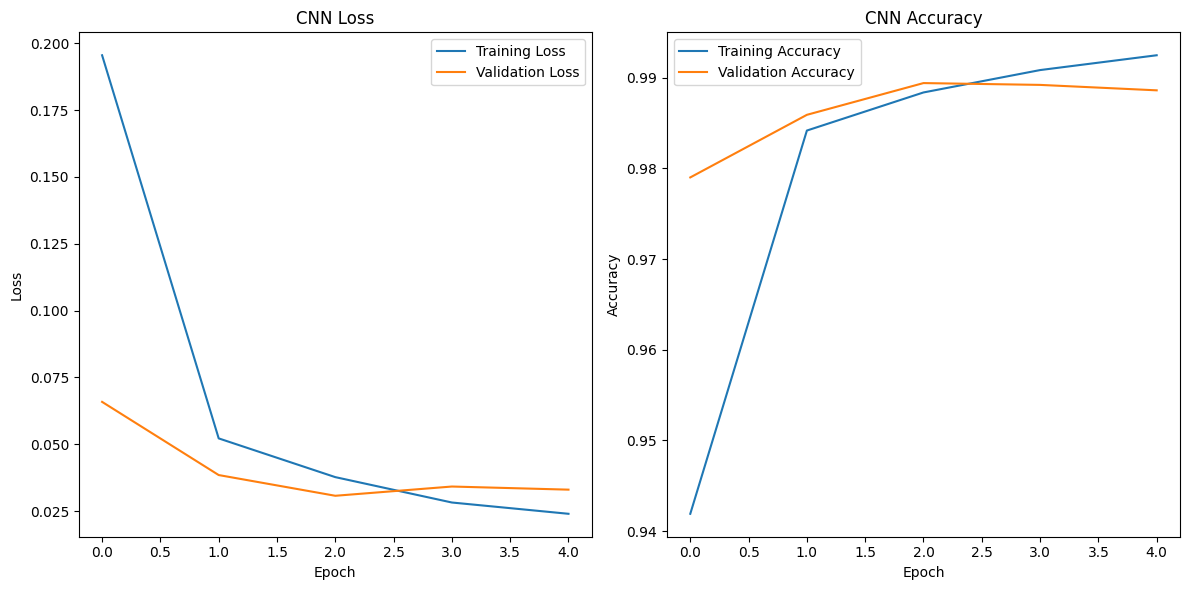

Epoch 1/5
938/938 [==============================] - 6s 6ms/step - loss: 0.2762 - accuracy: 0.9215 - val_loss: 0.1450 - val_accuracy: 0.9571
Epoch 2/5
938/938 [==============================] - 5s 6ms/step - loss: 0.1103 - accuracy: 0.9671 - val_loss: 0.1036 - val_accuracy: 0.9677
Epoch 3/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0764 - accuracy: 0.9771 - val_loss: 0.0872 - val_accuracy: 0.9728
Epoch 4/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0555 - accuracy: 0.9826 - val_loss: 0.0846 - val_accuracy: 0.9723
Epoch 5/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0443 - accuracy: 0.9856 - val_loss: 0.0811 - val_accuracy: 0.9756
MLP Model Evaluation:
313/313 - 1s - loss: 0.0811 - accuracy: 0.9756 - 546ms/epoch - 2ms/step
Test accuracy: 0.975600004196167


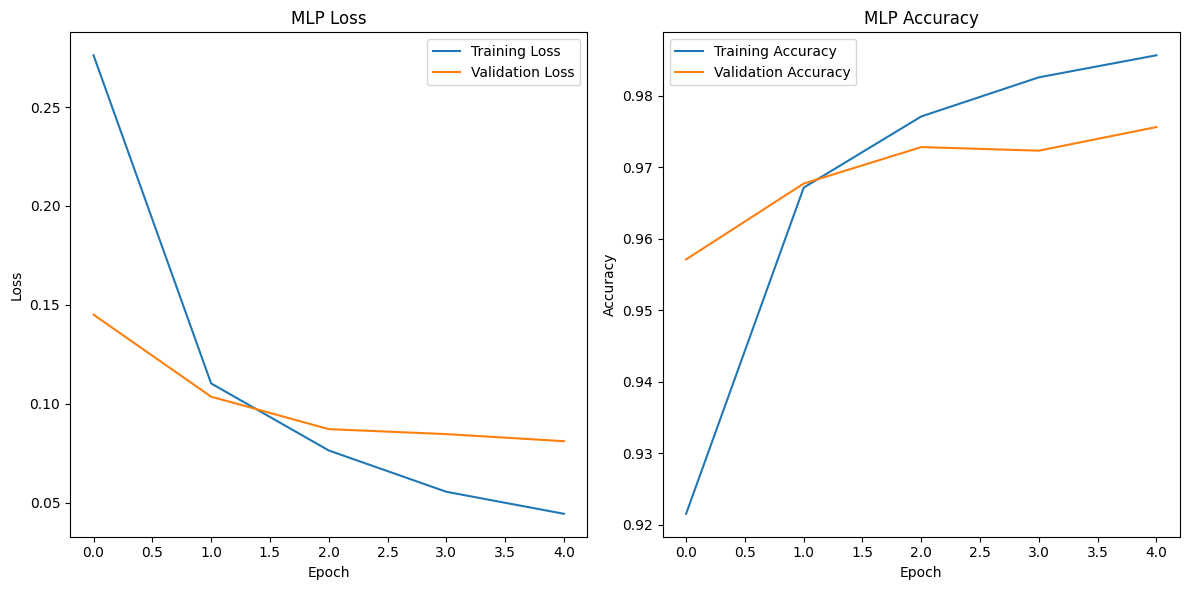

In [24]:
def main():
    # Load and preprocess data for CNN
    (x_train_cnn, y_train_cnn), (x_test_cnn, y_test_cnn) = load_and_preprocess_data()

    # Create and compile CNN model
    cnn_model = cnn()

    # Train the CNN model
    cnn_model, cnn_history = train_model(cnn_model, x_train_cnn, y_train_cnn, x_test_cnn, y_test_cnn)

    # Evaluate the CNN model
    print("CNN Model Evaluation:")
    evaluate_model(cnn_model, x_test_cnn, y_test_cnn)

    # Plot CNN training history
    plot_training_history(cnn_history, 'CNN')

    # Load and preprocess data for MLP
    (x_train_mlp, y_train_mlp), (x_test_mlp, y_test_mlp) = load_and_preprocess_data(flatten=True)

    # Create and compile MLP model
    mlp_model = mlp()

    # Train the MLP model
    mlp_model, mlp_history = train_model(mlp_model, x_train_mlp, y_train_mlp, x_test_mlp, y_test_mlp)

    # Evaluate the MLP model
    print("MLP Model Evaluation:")
    evaluate_model(mlp_model, x_test_mlp, y_test_mlp)

    # Plot MLP training history
    plot_training_history(mlp_history, 'MLP')

if __name__ == "__main__":
    main()